In [64]:
! pip install seaborn

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [68]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [69]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,11,3
top,May,Returning_Visitor
freq,3348,10551


In [70]:
df.duplicated().sum()

109

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.628345
ProductRelated             0.000000
ProductRelated_Duration    4.001309
BounceRates                0.000000
ExitRates                  0.810081
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [73]:
median_inf_dur = df['Informational_Duration'].median()
median_prod_dur = df['ProductRelated_Duration'].median()

df['Informational_Duration'].fillna(median_inf_dur, inplace=True)
df['ProductRelated_Duration'].fillna(median_prod_dur, inplace=True)
df.dropna(subset=['ExitRates'], inplace=True)

C:\Users\ivans\AppData\Local\Temp\ipykernel_20400\3514581402.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ivans\AppData\Local\Temp\ipykernel_20400\3514581402.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [74]:
df.nunique()

Administrative               27
Administrative_Duration    3313
Informational                17
Informational_Duration     1232
ProductRelated              309
ProductRelated_Duration    9142
BounceRates                1859
ExitRates                  4746
PageValues                 2677
SpecialDay                    6
Month                        11
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [75]:
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
categorial_features = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

In [76]:
df['Month'] = df['Month'].replace('aug', 'Aug')

<Axes: >

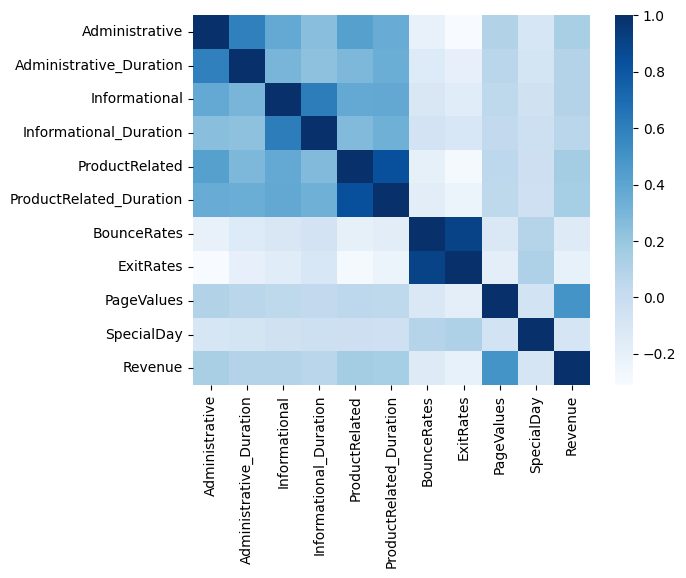

In [77]:
corr = df[['Administrative', 'Administrative_Duration',
	'Informational', 'Informational_Duration',
	'ProductRelated', 'ProductRelated_Duration',
	'BounceRates', 'ExitRates', 'PageValues',
	'SpecialDay', 'Revenue']].corr(numeric_only=True)

sns.heatmap(corr, cmap='Blues')

<Axes: >

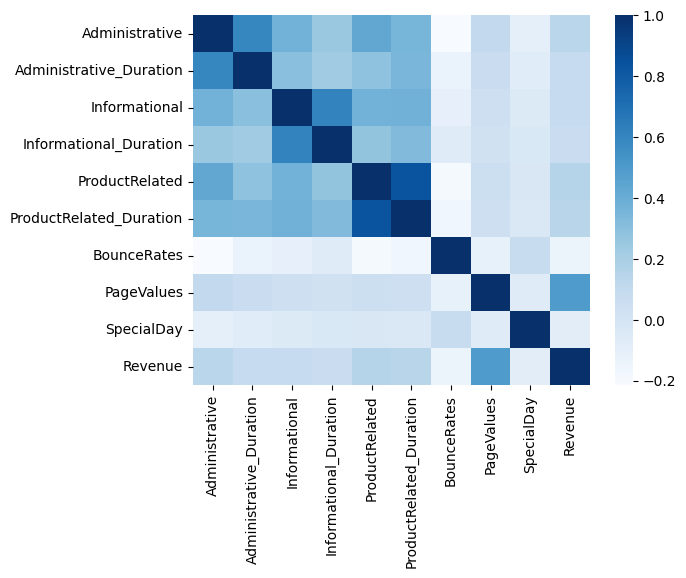

In [78]:
corr = df[['Administrative', 'Administrative_Duration',
	'Informational', 'Informational_Duration',
	'ProductRelated', 'ProductRelated_Duration',
	'BounceRates', 'PageValues',
	'SpecialDay', 'Revenue']].corr(numeric_only=True)

sns.heatmap(corr, cmap='Blues')

<Axes: >

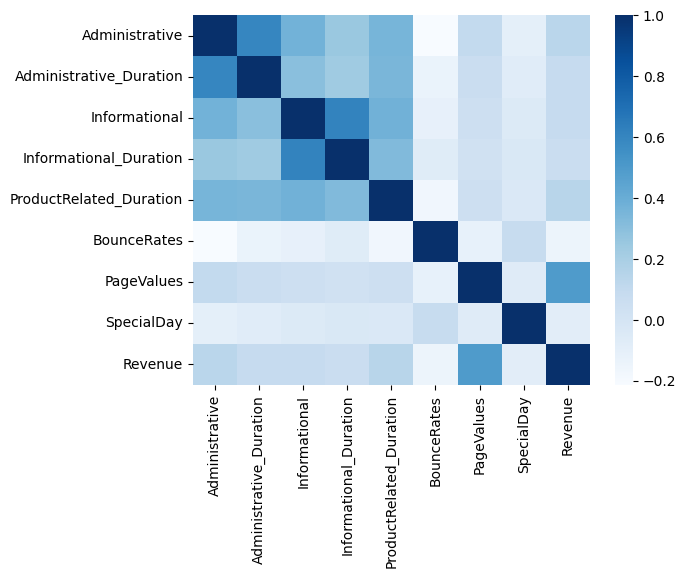

In [79]:
corr = df[['Administrative', 'Administrative_Duration',
	'Informational', 'Informational_Duration', 'ProductRelated_Duration',
	'BounceRates', 'PageValues',
	'SpecialDay', 'Revenue']].corr(numeric_only=True)
sns.heatmap(corr, cmap='Blues')

Итого: не берем в обучение признаки ExitRates, ProductRelated как высоко скоррелированные.

In [80]:
X = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay']]
y = df['Revenue']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

,priors,None
,var_smoothing,1e-09


In [83]:
from sklearn.model_selection import cross_val_score

cross_val_score(gnb, X, y, scoring='accuracy', cv=3, n_jobs=-1).mean()

0.8482086868672019

На трех фолдах модель наивного классификатора, которая обучалась только на числовых признаках, показала среднюю точность в ~ 0.848.

In [84]:
from sklearn.model_selection import cross_validate

pd.DataFrame(cross_validate(gnb, X, y, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=3, n_jobs=-1)).apply(np.mean)

fit_time          0.004667
score_time        0.009666
test_accuracy     0.848209
test_precision    0.523693
test_recall       0.494709
test_f1           0.505807
dtype: float64

На трех фолдах модель наивного классификатора, которая обучалась только на числовых признаках, показала точность ~0.842, precision ~0.51, recall ~0.496, f1 ~0.497. По метрикам модель получилась не очень хорошей. Вероятно так получилось из-за того, что данные несбалансированы (класса False в данных ~ в 5 раз больше, чем класса True)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

knn_cl = KNeighborsClassifier()
knn_cl.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [86]:
pd.DataFrame(cross_validate(knn_cl, X, y, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=3, n_jobs=-1)).apply(np.mean)

fit_time          0.019666
score_time        0.039007
test_accuracy     0.860913
test_precision    0.613893
test_recall       0.290534
test_f1           0.393814
dtype: float64

In [87]:
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

cv_results = cross_validate(
    knn_pipeline, X, y,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    cv=3, n_jobs=-1
)

pd.DataFrame(cv_results).apply(np.mean)

fit_time          0.020679
score_time        0.071352
test_accuracy     0.879804
test_precision    0.671628
test_recall       0.452790
test_f1           0.540344
dtype: float64

Обучил 2 разные модели knn: на масштабированных и немасштабированных данных. За счет масштабирования данных модель улучшила все метрики: accuracy (0.88 и 0.86), precision (0.672 и 0.613), recall (0.453 и 0.29), f1 (0.54 и 0.394) 

In [88]:
from sklearn.linear_model import LogisticRegression

logreg_pipe = Pipeline([
	('scaler', MinMaxScaler()),
	('logreg', LogisticRegression())

])

cv_results = cross_validate(
    logreg_pipe, X, y,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    cv=3, n_jobs=-1
)

pd.DataFrame(cv_results).apply(np.mean)

fit_time          0.012997
score_time        0.009669
test_accuracy     0.869823
test_precision    0.764087
test_recall       0.244445
test_f1           0.368348
dtype: float64

Модель лог. регрессии на масштабированных числовых признаках показала следующие метрики: accuracy ~ 0.87, precision ~ 0.764, recall ~ 0.244, f1 ~ 0.368

Перейдем к подбору гиперпараметров


In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "var_smoothing": np.logspace(-12, -6, 13)
}
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
	'precision': 'precision',
	'recall': 'recall',
    "roc_auc": "roc_auc"
}
gs = GridSearchCV(gnb, param_grid, scoring=scoring, refit='f1', cv=3, n_jobs=-1)
gs.fit(X_train, y_train)

,estimator,GaussianNB()
,param_grid,{'var_smoothing': array([1.0000...00000000e-06])}
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,-1
,refit,'f1'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [90]:
gs.best_params_, gs.best_estimator_, gs.best_score_

({'var_smoothing': 1e-12}, GaussianNB(var_smoothing=1e-12), 0.5210244051050593)

In [91]:
results = pd.DataFrame(gs.cv_results_)

# строка с лучшей моделью (по refit)
best_row = results.loc[gs.best_index_]
best_metrics = {
    'mean_test_accuracy': best_row['mean_test_accuracy'],
    'mean_test_precision': best_row['mean_test_precision'],
    'mean_test_recall': best_row['mean_test_recall'],
    'mean_test_f1': best_row['mean_test_f1'],
    'mean_test_roc_auc': best_row['mean_test_roc_auc']
}
pd.Series(best_metrics)

mean_test_accuracy     0.842041
mean_test_precision    0.488969
mean_test_recall       0.557863
mean_test_f1           0.521024
mean_test_roc_auc      0.833841
dtype: float64

Лучшая модель наивного байесовского классификатора по метрике f1 - модель с гиперпараметром var_smoothing = 1 * 10^(-12). С таким гиперпараметром f1 ~ 0.521

In [92]:
param_knn = {'knn__n_neighbors': np.arange(2, 30),
			 'knn__weights': ['uniform', 'distance'],
			 'knn__p': [1, 2]}

gs_knn = GridSearchCV(knn_pipeline, param_knn, scoring=scoring, refit='f1', n_jobs=-1, cv=3)
gs_knn.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'knn__n_neighbors': array([ 2, 3..., 27, 28, 29]), 'knn__p': [1, 2], 'knn__weights': ['uniform', 'distance']}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,-1
,refit,'f1'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [93]:
gs_knn.best_params_, gs_knn.best_score_

({'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'uniform'},
 0.5523022820893576)

In [94]:
results = pd.DataFrame(gs_knn.cv_results_)

best_row = results.loc[gs_knn.best_index_]
best_metrics = {
    'mean_test_accuracy': best_row['mean_test_accuracy'],
    'mean_test_precision': best_row['mean_test_precision'],
    'mean_test_recall': best_row['mean_test_recall'],
    'mean_test_f1': best_row['mean_test_f1'],
    'mean_test_roc_auc': best_row['mean_test_roc_auc']
}
# метрики лучшей модели по f1
pd.Series(best_metrics)

mean_test_accuracy     0.879771
mean_test_precision    0.648901
mean_test_recall       0.481427
mean_test_f1           0.552302
mean_test_roc_auc      0.789311
dtype: float64

Лучшая модель kNN классификатора по метрике f1 - модель с k = 3, весами по умолчанию и измерением расстояния с помощью Евклидова расстояния.

In [95]:
param_logreg = {'logreg__C': np.logspace(4, -4, 10),
				'logreg__penalty': ['l1', 'l2', None],
				'logreg__class_weight': [None, 'balanced']}


gs_logreg = GridSearchCV(logreg_pipe, param_logreg, scoring=scoring, refit='f1', n_jobs=-1, cv=3)
gs_logreg.fit(X_train, y_train)

c:\EDA_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last

,estimator,Pipeline(step...egression())])
,param_grid,"{'logreg__C': array([1.0000...00000000e-04]), 'logreg__class_weight': [None, 'balanced'], 'logreg__penalty': ['l1', 'l2', ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,-1
,refit,'f1'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [96]:
X_train.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay'],
      dtype='object')

In [97]:
gs_logreg.best_params_

{'logreg__C': 10000.0,
 'logreg__class_weight': 'balanced',
 'logreg__penalty': 'l2'}

In [98]:
results = pd.DataFrame(gs_logreg.cv_results_)

# строка с лучшей моделью (по refit)
best_row = results.loc[gs_logreg.best_index_]
best_metrics = {
    'mean_test_accuracy': best_row['mean_test_accuracy'],
    'mean_test_precision': best_row['mean_test_precision'],
    'mean_test_recall': best_row['mean_test_recall'],
    'mean_test_f1': best_row['mean_test_f1'],
    'mean_test_roc_auc': best_row['mean_test_roc_auc']
}
# метрики лучшей модели по f1
pd.Series(best_metrics)

mean_test_accuracy     0.872951
mean_test_precision    0.568771
mean_test_recall       0.727874
mean_test_f1           0.638302
mean_test_roc_auc      0.887309
dtype: float64

Лучшая модель среди логистических регрессий - это логистическая регрессия с l2-регуляризацией, балансировкой классов и С = 10000. Ее средние метрики на трех фолдах: accuracy ~ 0.873, precision ~ 0.569, recall ~ 0.728, f1 ~ 0.638, roc_auc ~ 0.887

Среди всех остальных моделей самая лучшая по метрикам - логистическая регрессия. Берем ее для учета категориальных признаков.

In [99]:
X = df.drop(columns=['Revenue', 'ExitRates', 'ProductRelated'])
X.nunique()

Administrative               27
Administrative_Duration    3313
Informational                17
Informational_Duration     1232
ProductRelated_Duration    9142
BounceRates                1859
PageValues                 2677
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

К категориальным признакам относятся Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend

Разобьем месяца по кварталам, и назначим категориальную переменную по кварталам. Базовый квартал - зимний

In [100]:
spring = ['Mar', 'Apr', 'May']
summer = ['June', 'Jul', 'Aug']
autumn = ['Sep', 'Oct', 'Nov']

In [101]:
X['Spring'] = X['Month'].isin(spring)
X['Summer'] = X['Month'].isin(summer)
X['Autumn'] = X['Month'].isin(autumn)
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Spring,Summer,Autumn
0,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,False,False
1,0,0.0,0,0.0,64.000000,0.000000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,False,False
2,0,0.0,0,0.0,0.000000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,False,False
3,0,0.0,0,0.0,2.666667,0.050000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,False,False
4,0,0.0,0,0.0,627.500000,0.020000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,1783.791667,0.007143,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,False,False
12326,0,0.0,0,0.0,465.750000,0.000000,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,False,True
12327,0,0.0,0,0.0,184.250000,0.083333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,False,True
12328,4,75.0,0,0.0,346.000000,0.000000,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,False,True


Теперь приступим к TrafficType. Все значения TrafficType, которые встречаются реже одного процента, скинем в категорию TrafficTypeOther. Для всех оставшихся заведем по отдельному признаку методом ohe, удалим один столбец для отсутствия линейной зависимости. Аналогично сделаем для всех остальных признков.

In [102]:
ser = X['TrafficType'].value_counts(normalize=True)
rare_cats = ser[ser < 0.01].index

In [103]:
ser[ser >= 0.01]

TrafficType
2     0.319832
1     0.196337
3     0.164907
4     0.087362
13    0.059396
10    0.036958
6     0.036380
8     0.028048
5     0.021284
11    0.020211
20    0.015839
Name: proportion, dtype: float64

In [104]:
X['TrafficTypeOther'] = X['TrafficType'].isin(rare_cats)
X['TrafficType_freq'] = X['TrafficType'].where(~X['TrafficType'].isin(rare_cats))
X = pd.get_dummies(X, columns=['TrafficType_freq'], drop_first=False)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Spring', 'Summer',
       'Autumn', 'TrafficTypeOther', 'TrafficType_freq_1.0',
       'TrafficType_freq_2.0', 'TrafficType_freq_3.0', 'TrafficType_freq_4.0',
       'TrafficType_freq_5.0', 'TrafficType_freq_6.0', 'TrafficType_freq_8.0',
       'TrafficType_freq_10.0', 'TrafficType_freq_11.0',
       'TrafficType_freq_13.0', 'TrafficType_freq_20.0'],
      dtype='object')

In [105]:
ser = X['OperatingSystems'].value_counts(normalize=True)
rare_cats = ser[ser < 0.01].index

X['OperatingSystemsOther'] = X['OperatingSystems'].isin(rare_cats)
X['OperatingSystems_freq'] = X['OperatingSystems'].where(~X['OperatingSystems'].isin(rare_cats))
X = pd.get_dummies(X, columns=['OperatingSystems_freq'], drop_first=False)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Spring', 'Summer',
       'Autumn', 'TrafficTypeOther', 'TrafficType_freq_1.0',
       'TrafficType_freq_2.0', 'TrafficType_freq_3.0', 'TrafficType_freq_4.0',
       'TrafficType_freq_5.0', 'TrafficType_freq_6.0', 'TrafficType_freq_8.0',
       'TrafficType_freq_10.0', 'TrafficType_freq_11.0',
       'TrafficType_freq_13.0', 'TrafficType_freq_20.0',
       'OperatingSystemsOther', 'OperatingSystems_freq_1.0',
       'OperatingSystems_freq_2.0', 'OperatingSystems_freq_3.0',
       'OperatingSystems_freq_4.0'],
      dtype='object')

In [106]:
ser = X['Browser'].value_counts(normalize=True)
rare_cats = ser[ser < 0.01].index

X['BrowserOther'] = X['Browser'].isin(rare_cats)
X['Browser_freq'] = X['Browser'].where(~X['Browser'].isin(rare_cats))
X = pd.get_dummies(X, columns=['Browser_freq'], drop_first=False)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Spring', 'Summer',
       'Autumn', 'TrafficTypeOther', 'TrafficType_freq_1.0',
       'TrafficType_freq_2.0', 'TrafficType_freq_3.0', 'TrafficType_freq_4.0',
       'TrafficType_freq_5.0', 'TrafficType_freq_6.0', 'TrafficType_freq_8.0',
       'TrafficType_freq_10.0', 'TrafficType_freq_11.0',
       'TrafficType_freq_13.0', 'TrafficType_freq_20.0',
       'OperatingSystemsOther', 'OperatingSystems_freq_1.0',
       'OperatingSystems_freq_2.0', 'OperatingSystems_freq_3.0',
       'OperatingSystems_freq_4.0', 'BrowserOther', 'Browser_freq_1.0',
       'Browser_freq_2.0', 'Browser_freq_4.0', 'Browser_freq_5.0',
       'Browser_freq_6.0', 'Browser_freq_8.0', 'Browser_freq_10.0'],
      dtype='object')

In [107]:
ser = df['Region'].value_counts(normalize=True)
ser

Region
1    0.386405
3    0.194935
4    0.095611
2    0.092806
6    0.065253
7    0.062118
9    0.041247
8    0.035473
5    0.026151
Name: proportion, dtype: float64

В Region нет таких значений, которые встречались бы реже 1 %. Включаем все браузеры.

In [108]:
X = pd.get_dummies(X, columns=['Region'], drop_first=True)
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'TrafficType', 'VisitorType', 'Weekend', 'Spring', 'Summer', 'Autumn',
       'TrafficTypeOther', 'TrafficType_freq_1.0', 'TrafficType_freq_2.0',
       'TrafficType_freq_3.0', 'TrafficType_freq_4.0', 'TrafficType_freq_5.0',
       'TrafficType_freq_6.0', 'TrafficType_freq_8.0', 'TrafficType_freq_10.0',
       'TrafficType_freq_11.0', 'TrafficType_freq_13.0',
       'TrafficType_freq_20.0', 'OperatingSystemsOther',
       'OperatingSystems_freq_1.0', 'OperatingSystems_freq_2.0',
       'OperatingSystems_freq_3.0', 'OperatingSystems_freq_4.0',
       'BrowserOther', 'Browser_freq_1.0', 'Browser_freq_2.0',
       'Browser_freq_4.0', 'Browser_freq_5.0', 'Browser_freq_6.0',
       'Browser_freq_8.0', 'Browser_freq_10.0', 'Region_2', 'Region_3',
       'Region_4', 'Reg

In [109]:
X['VisitorType'].value_counts(normalize=True)


VisitorType
Returning_Visitor    0.855057
New_Visitor          0.138344
Other                0.006600
Name: proportion, dtype: float64

Other уже посчитан, включаем как категориальный признак

In [110]:
X = pd.get_dummies(X, columns=['VisitorType'], drop_first=True)


In [111]:
df_final = X.drop(columns=['Month', 'OperatingSystems', 'Browser',
							'TrafficType', 'TrafficTypeOther', 'OperatingSystemsOther', 
							'BrowserOther'])
df_final.columns = pd.Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Weekend', 'Spring', 'Summer', 'Autumn',
       'TrafficType_freq_1', 'TrafficType_freq_2', 'TrafficType_freq_3',
       'TrafficType_freq_4', 'TrafficType_freq_5', 'TrafficType_freq_6',
       'TrafficType_freq_8', 'TrafficType_freq_10',
       'TrafficType_freq_11', 'TrafficType_freq_13',
       'TrafficType_freq_20', 'OperatingSystems_freq_1',
       'OperatingSystems_freq_2', 'OperatingSystems_freq_3',
       'OperatingSystems_freq_4', 'Browser_freq_1', 'Browser_freq_2',
       'Browser_freq_4', 'Browser_freq_5', 'Browser_freq_6',
       'Browser_freq_8', 'Browser_freq_10', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'])

In [112]:
df_final.shape

(12122, 44)

In [113]:
#df_final[['TrafficTypeOther', 'TrafficType_freq_1.0', 'TrafficType_freq_2.0',
       #'TrafficType_freq_3.0', 'TrafficType_freq_4.0', 'TrafficType_freq_5.0',
       ##'TrafficType_freq_11.0', 'TrafficType_freq_13.0',
       #'TrafficType_freq_20.0']].apply(any, axis=1).all()

In [114]:
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(df_final, df['Revenue'], random_state=42)


gs_final_logreg = GridSearchCV(logreg_pipe, param_grid=param_logreg, scoring=scoring, refit='f1', n_jobs=-1, cv=3)
gs_final_logreg.fit(X_final_train, y_final_train)

c:\EDA_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last

,estimator,Pipeline(step...egression())])
,param_grid,"{'logreg__C': array([1.0000...00000000e-04]), 'logreg__class_weight': [None, 'balanced'], 'logreg__penalty': ['l1', 'l2', ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,-1
,refit,'f1'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [115]:
gs_final_logreg.best_params_, gs_final_logreg.best_score_

({'logreg__C': 10000.0,
  'logreg__class_weight': 'balanced',
  'logreg__penalty': None},
 0.6034532475835656)

In [116]:
results = pd.DataFrame(gs_final_logreg.cv_results_)

# строка с лучшей моделью (по refit)
best_row = results.loc[gs_final_logreg.best_index_]
best_metrics = {
    'mean_test_accuracy': best_row['mean_test_accuracy'],
    'mean_test_precision': best_row['mean_test_precision'],
    'mean_test_recall': best_row['mean_test_recall'],
    'mean_test_f1': best_row['mean_test_f1'],
    'mean_test_roc_auc': best_row['mean_test_roc_auc']
}
# метрики лучшей модели по f1

pd.Series(best_metrics)

mean_test_accuracy     0.848860
mean_test_precision    0.508108
mean_test_recall       0.744286
mean_test_f1           0.603453
mean_test_roc_auc      0.897415
dtype: float64

Лучшая регрессия с категориальными признаками имеет параметры C = 0.359, class_weight = 'balanced', без штрафов, solver='sag'.

Попробую обучить модель без категориальных признаков с многими значениями: OperatingSystems, Browser, TrafficType, Region

In [117]:
df_final = X.drop(columns=['Month', 'OperatingSystems', 'Browser',
							'TrafficType', 'TrafficTypeOther', 'OperatingSystemsOther', 
							'BrowserOther', 'TrafficType_freq_1.0', 'TrafficType_freq_2.0', 'TrafficType_freq_3.0',
       'TrafficType_freq_4.0', 'TrafficType_freq_5.0', 'TrafficType_freq_6.0',
       'TrafficType_freq_8.0', 'TrafficType_freq_10.0',
       'TrafficType_freq_11.0', 'TrafficType_freq_13.0',
       'TrafficType_freq_20.0', 'OperatingSystems_freq_1.0',
       'OperatingSystems_freq_2.0', 'OperatingSystems_freq_3.0',
       'OperatingSystems_freq_4.0', 'Browser_freq_1.0', 'Browser_freq_2.0',
       'Browser_freq_4.0', 'Browser_freq_5.0', 'Browser_freq_6.0',
       'Browser_freq_8.0', 'Browser_freq_10.0', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9'])
df_final.columns.shape

(14,)

In [118]:
df_final.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Weekend', 'Spring', 'Summer', 'Autumn',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [119]:
X_final_train_14, X_final_test_14, y_final_train_14, y_final_test_14 = train_test_split(df_final, df['Revenue'], random_state=42)


gs_final_logreg2 = GridSearchCV(logreg_pipe, param_grid=param_logreg, scoring=scoring, refit='f1', n_jobs=-1, cv=3)
gs_final_logreg2.fit(X_final_train_14, y_final_train_14)

c:\EDA_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\EDA_project\.venv\Lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last

,estimator,Pipeline(step...egression())])
,param_grid,"{'logreg__C': array([1.0000...00000000e-04]), 'logreg__class_weight': [None, 'balanced'], 'logreg__penalty': ['l1', 'l2', ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall', ...}"
,n_jobs,-1
,refit,'f1'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,feature_range,"(0, ...)"


In [120]:
gs_final_logreg2.best_params_, gs_final_logreg2.best_score_

({'logreg__C': 10000.0,
  'logreg__class_weight': 'balanced',
  'logreg__penalty': None},
 0.6105184436740316)

In [121]:
results = pd.DataFrame(gs_final_logreg2.cv_results_)

# строка с лучшей моделью (по refit)
best_row = results.loc[gs_final_logreg2.best_index_]
best_metrics = {
    'mean_test_accuracy': best_row['mean_test_accuracy'],
    'mean_test_precision': best_row['mean_test_precision'],
    'mean_test_recall': best_row['mean_test_recall'],
    'mean_test_f1': best_row['mean_test_f1'],
    'mean_test_roc_auc': best_row['mean_test_roc_auc']
}
# метрики лучшей модели по f1

pd.Series(best_metrics)

mean_test_accuracy     0.856781
mean_test_precision    0.526959
mean_test_recall       0.727146
mean_test_f1           0.610518
mean_test_roc_auc      0.900248
dtype: float64

Модель без категориальных признаков OperatingSystems, Browser, TrafficType, Region лучше, чем с ними, но эта модель все еще хуже, чем модель, которая обучена только на числовых признаках ('Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration','ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay')

In [122]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [123]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [124]:
explainer = ClassifierExplainer(gs_logreg.best_estimator_, X_test, y_test)

splitting pipeline...
Detected sklearn/imblearn Pipeline and succesfully extracted final output dataframe with column names and final model...
Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...


In [125]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.jobl

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

In [126]:
#db = ExplainerDashboard(explainer)
db.run(host="127.0.0.1")

Starting ExplainerDashboard on http://192.168.1.130:8050


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\EDA_pro

Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


Анализируя дашборд, можно сделать следующие выводы:
1) Признаки, наиболее влияющие на прогноз, согласно методу Shaply values - это PageValues, BounceRates, ProductRelated_Duration. Аналогично для метода permutation features.

2) Значения метрик модели:
accuracy = 0.865 - модель классифицировала 86.5% объектов тестовой выборки правильно.

precision = 0.557 - среди всех объектов, которые модель классифицировала как положительные, реально положительными оказались 55.7%

recall = 0.77 - модель классифицировала 77% реально положительных объектов

roc_auc = 0.893 - модель способна различать классы.

f1 = 0.646 - сбалансированная метрика между precision и recall.


3) Анализ индивидуальных прогнозов:
Объект с индексом 11563:
В среднем объект из выборки имеет склонность быть положительным классом, поэтому стартуем с log-odd = 0.08. BounceRates == 0 => log-odd += 0.07. 
Administrative_Duration ==  0.006 => log-odd += 0.02. 
Informational_Duration == 0 => log-odd += 0.01
Промежуточный результат: log-odd = 0.18

Administrative = 0.074 => log-odd -= 0.03, 
Informational = 0.0 => log-odd -= 0.05, 
ProductRelated_Duration = 0.0043 => log-odd -= 0.16
PageValues = 0.0 => log-odd -= 1.2

Итоговый результат: log-odd = -1
Сигмойда от -1 = 0.269 - вероятность того, что объект с индексом 11563 будет принадлежать к положительному классу. 0.269 < 0.5 => относим к отрицательному классу.

Объект с индексом 3334:
log-odd = 0.08
BounceRates = 0.0056 => log-odd += 0.24
ProductRelated_Duration = 0.0356 => log-odd += 0.21
SpecialDay == 0 => log-odd += 0.07
Informational_Duration = 0 => log-odd += 0.01
Промежуточный результат: log-odd = 0.61

Administrative_Duration = 0.0288 => log-odd -= 0.01
Administrative = 0.074 => log-odd -= 0.03
Informational = 0.0 => log-odd -= 0.05
PageValues = 0.0193 => log-odd -= 0.38

Итоговый результат: log-odd = 0.14
Сигмойда от 0.14 = 0.535 - вероятность того, что объект с индексом 3334 будет принадлежать к положительному классу. 0.535 > 0.5 => относим к положительному классу.


In [128]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(-1))
print(sigmoid(.14))

0.2689414213699951
0.5349429451582145
